In [1]:
#importing libraries
from copy import copy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge, LogisticRegression
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, KFold
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option('display.max_columns', 35)

### Reading the data

In [2]:
train_data = pd.read_excel("data/Ex1_2.xlsx", sheet_name = 1)

In [3]:
#look at shape of the data
train_data.shape

(10000, 33)

In [4]:
#count duplicated data
train_data.duplicated().sum()

0

Let's look at the data

In [5]:
train_data.head(20)

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,283,1,0.00000,NaN,NaN,10,0,1.02273,1.01608,1.55268,1.15000,30.00000,123.00000,45.54444,3.80000,7.32222,38.22222,3.83333,819.35667,0.0,1.66667,0.00000,0.28560,831.68333,783.81667,171.33333,818.15000,0.62772,0.13333,0.00000,6.41893,0.97122,6.41893
1,342,0,0.00000,30.00000,6.80153,0,0,1.00000,1.65348,1.14852,0.40556,9.00000,78.00000,23.74444,17.97222,0.00000,23.74444,3.83333,316.61667,0.0,0.33333,0.00000,0.00000,195.13889,168.30000,81.00000,NaN,6.32407,0.26667,0.33333,NaN,1.60714,3.44800
2,631,0,0.00000,30.00000,9.60267,0,0,1.00000,0.84143,NaN,0.00000,28.66667,12.66667,15.80000,22.57222,4.58333,11.21667,3.83333,184.49333,0.0,0.00000,0.00000,-2.28400,226.10556,207.41667,110.00000,184.49444,2.25635,0.00000,0.06667,NaN,0.75000,8.08000
3,1165,0,0.00000,30.33333,15.32553,0,0,0.98901,0.88114,NaN,2.68333,61.66667,112.33333,121.02222,175.54444,10.20556,110.81667,3.83333,625.32333,0.0,2.00000,-2.69380,-2.73230,567.53889,441.52778,194.00000,625.32222,2.74469,0.13333,0.40000,13.50400,0.98119,13.50400
4,1469,0,0.00000,28.00000,7.54133,0,0,0.92857,1.21447,0.60138,0.00000,26.00000,89.00000,66.92222,7.52778,0.00000,66.92222,3.83333,53.45000,0.0,0.00000,0.00000,2.42605,154.80556,86.64444,71.66667,53.45000,0.91130,0.46667,0.40000,NaN,0.40171,3.44800
5,4004,1,9.09091,13.66667,4.60533,6,1,0.58537,0.97355,0.00931,0.00000,12.66667,37.66667,1.71667,1.00000,0.00000,1.71667,3.80000,7.68000,0.0,0.00000,0.00000,0.00000,15.07778,11.01667,15.66667,7.67778,0.37037,0.13333,0.13333,4.32000,2.00000,4.32000
6,4831,0,0.00000,NaN,9.53600,0,0,0.98901,1.00000,1.08311,22.90000,30.33333,44.33333,72.92778,42.51111,9.41111,63.51667,3.80000,734.40667,0.0,37.66667,0.00000,0.00000,843.35000,769.57222,146.33333,734.40556,0.75154,0.20000,0.33333,9.53600,1.06780,9.53600
7,5742,0,0.00000,30.33333,18.29600,0,0,0.98901,1.02798,0.88837,7.02778,44.33333,96.66667,117.52778,253.35556,17.72778,99.80000,NaN,345.59000,0.0,9.00000,0.00000,0.76800,264.94444,130.52778,328.66667,342.96667,1.16378,0.53333,0.66667,13.96000,1.58491,13.96000
8,8162,0,0.00000,25.33333,NaN,0,0,1.06579,1.14553,1.07784,0.00000,17.00000,34.66667,4.21667,10.15556,0.00000,4.21667,3.80000,154.12000,0.0,0.00000,0.00000,1.89515,139.35000,134.56667,102.66667,154.11667,3.35139,0.00000,0.06667,1.31200,0.96774,1.31200
9,9941,0,14.28571,26.33333,NaN,8,1,0.94937,1.33023,0.80439,0.00000,12.66667,43.33333,1.86111,1.67778,0.18333,1.67778,3.80000,36.56667,0.0,0.00000,0.00000,0.00000,81.13889,79.27222,26.33333,36.56667,0.28125,0.13333,0.13333,4.03200,1.04362,4.03200


Print summary statistics for each variable

In [6]:
train_data.describe()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
count,1.000000e+04,10000.000000,10000.000000,8492.000000,8523.000000,10000.000000,10000.000000,10000.000000,10000.000000,8482.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8475.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8496.000000,10000.000000,10000.000000,10000.000000,8467.000000,10000.000000,10000.000000
mean,5.572251e+06,0.500000,1.032911,24.972718,14.497498,2.329800,0.079200,0.950521,0.993450,0.875107,9.984656,25.943533,53.019700,44.310871,49.439603,9.970234,34.340020,3.033263,267.130726,0.667683,4.506033,0.024458,-0.233712,254.005455,204.907409,124.197333,268.877144,1.683967,0.183617,0.179254,9.048853,0.973444,10.625063
std,4.206422e+06,0.500025,3.977033,7.537203,10.703977,5.754871,0.270064,0.217456,0.223170,0.524680,62.804927,24.575361,49.917951,102.995779,136.913633,49.735128,85.958308,2.145360,352.495923,1.817174,14.187659,4.536959,8.879520,299.695057,263.099484,137.442492,355.736543,1.997374,0.189519,0.194499,5.529335,0.528715,6.688086
min,2.830000e+02,0.000000,0.000000,1.000000,0.723030,0.000000,0.000000,0.048390,0.000000,0.000000,0.000000,0.333330,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,-68.072400,-192.655500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.811950e+06,0.000000,0.000000,22.333330,8.004265,0.000000,0.000000,0.939760,0.916913,0.592615,0.000000,11.333330,21.000000,1.877780,1.365280,0.000000,0.994440,0.866670,47.525000,0.000000,0.000000,0.000000,-1.259513,52.851392,33.952780,33.000000,47.193053,0.507607,0.000000,0.000000,4.320000,0.750000,5.096000
50%,3.583642e+06,0.500000,0.000000,28.666670,12.532000,0.000000,0.000000,0.989010,0.997990,0.883840,0.338890,19.333330,39.333330,12.050000,10.661110,0.438890,7.991665,2.866670,147.523330,0.000000,0.333330,0.000000,0.000000,150.805555,110.519445,83.166665,146.880555,1.194580,0.133330,0.133330,9.115600,1.000000,9.536000
75%,1.010481e+07,1.000000,0.000000,30.333330,18.522270,1.000000,0.000000,1.000000,1.048620,1.129363,4.344440,33.000000,69.000000,44.690278,44.313887,4.605560,32.933335,5.000000,345.402500,0.000000,3.000000,0.000000,0.360000,348.923610,274.991665,167.000000,346.656943,2.146517,0.266670,0.266670,9.920000,1.216220,14.456000
max,1.288771e+07,1.000000,66.666670,30.333330,287.935870,30.000000,1.000000,2.437500,2.763270,3.000000,3313.494440,647.000000,1815.333330,2452.133330,3469.405560,1985.044440,2451.711110,8.233330,5357.526670,45.925330,406.666670,177.904600,347.606200,3803.522220,3043.930670,1625.333330,5339.972220,26.899270,1.000000,1.000000,96.288000,7.246720,97.352000


Check the types of features

In [7]:
train_data.dtypes

ID          int64
Target      int64
P1        float64
P2        float64
P3        float64
P4          int64
P5          int64
P6        float64
P7        float64
P8        float64
P9        float64
P10       float64
P11       float64
P12       float64
P13       float64
P14       float64
P15       float64
P16       float64
P17       float64
P18       float64
P19       float64
P20       float64
P21       float64
P22       float64
P23       float64
P24       float64
P25       float64
P26       float64
P27       float64
P28       float64
P29       float64
P30       float64
P31       float64
dtype: object

In [8]:
train_data.Target.value_counts()

1    5000
0    5000
Name: Target, dtype: int64

In [9]:
train_data.P5.value_counts()

0    9208
1     792
Name: P5, dtype: int64

In [10]:
train_data.P4.value_counts()

0     7432
1      365
2      265
3      245
4      182
5      175
6      128
7      114
30      95
8       92
10      78
9       77
18      70
11      69
19      62
13      61
12      57
17      52
20      48
15      48
14      43
16      43
22      32
26      27
23      24
25      23
21      21
24      20
28      20
29      17
27      15
Name: P4, dtype: int64

P4, P5 and Target has discrete values, all other variables are continuous

In [11]:
#making lists with categorical and numerical features
cat_cols = ["P4", "P5", "Target"]
num_cols = [column for column in train_data.columns if column not in cat_cols]

### Working with missing data

Print overall count of missing values for features with nans

In [12]:
miss_data = pd.DataFrame({
    'Missing': train_data.isna().sum(),
    'Missing(%)': (train_data.isna().sum() / train_data.shape[0]) * 100
}).sort_values(by='Missing', ascending=False).query("Missing != 0")
miss_data

,Missing,Missing(%)
P29,1533,15.33
P16,1525,15.25
P8,1518,15.18
P2,1508,15.08
P25,1504,15.04
P3,1477,14.77


There are about **15% missing values** for 6 features

Let's check the dependecies between whether the feature is known and the target

In [13]:
miss_cols = miss_data.index.to_list()
for col in miss_cols:
    print(train_data.groupby(train_data[col].notna()).mean().Target)

P29
False    0.520548
True     0.496280
Name: Target, dtype: float64
P16
False    0.500328
True     0.499941
Name: Target, dtype: float64
P8
False    0.505929
True     0.498939
Name: Target, dtype: float64
P2
False    0.513263
True     0.497645
Name: Target, dtype: float64
P25
False    0.498670
True     0.500235
Name: Target, dtype: float64
P3
False    0.488829
True     0.501936
Name: Target, dtype: float64


There are no visible relationships between target and whether the feature is known or not. 

Let's see how features with missing values can help us to predict the target. 

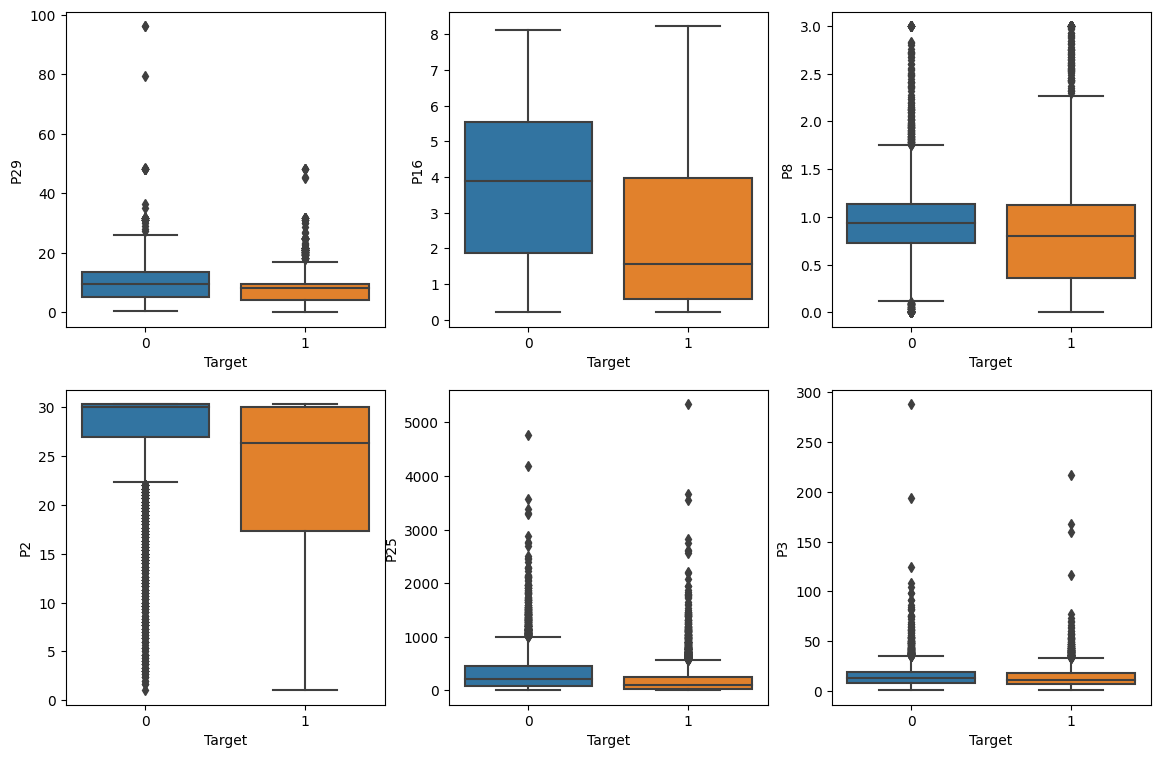

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(14, 9))
for i, col in enumerate(miss_cols):
    sns.boxplot(ax=axs[i // 3][i % 3], x=train_data.Target ,y=train_data[col])
    axs[i // 3][i % 3].set_ylabel(f"{col}") 

We can see that **P2 and P16** could be a good predictors

Maybe we can predict the missing values by another column with known features. Let's check the relationships

In [15]:
correlation_matrix = train_data.corr()
for miss_col in miss_cols:
    query = list(correlation_matrix[miss_col].abs().sort_values(ascending=False)[1:4].items())
    res = f"{query[0][0]} - {query[0][1]} \n{query[1][0]} - {query[1][1]}\n{query[2][0]} - {query[2][1]}"
    print(f"Missing col - {miss_col} correlated with:\n{res}\n")

Missing col - P29 correlated with:
P31 - 0.9082726361974442 
P3 - 0.6323544264545344
P10 - 0.4042231259276856

Missing col - P16 correlated with:
ID - 0.8543128557554995 
Target - 0.31587071126901656
P10 - 0.28871907773440864

Missing col - P8 correlated with:
P6 - 0.4506387404700092 
P4 - 0.22345338617008478
P7 - 0.2162401907883648

Missing col - P2 correlated with:
P24 - 0.45243866110612524 
P22 - 0.4256824809013563
P10 - 0.4081650718130914

Missing col - P25 correlated with:
P17 - 0.9979233350662174 
P24 - 0.7709618368705242
P22 - 0.6878471115352291

Missing col - P3 correlated with:
P31 - 0.6868408883358139 
P29 - 0.6323544264545344
P11 - 0.4141081895278672



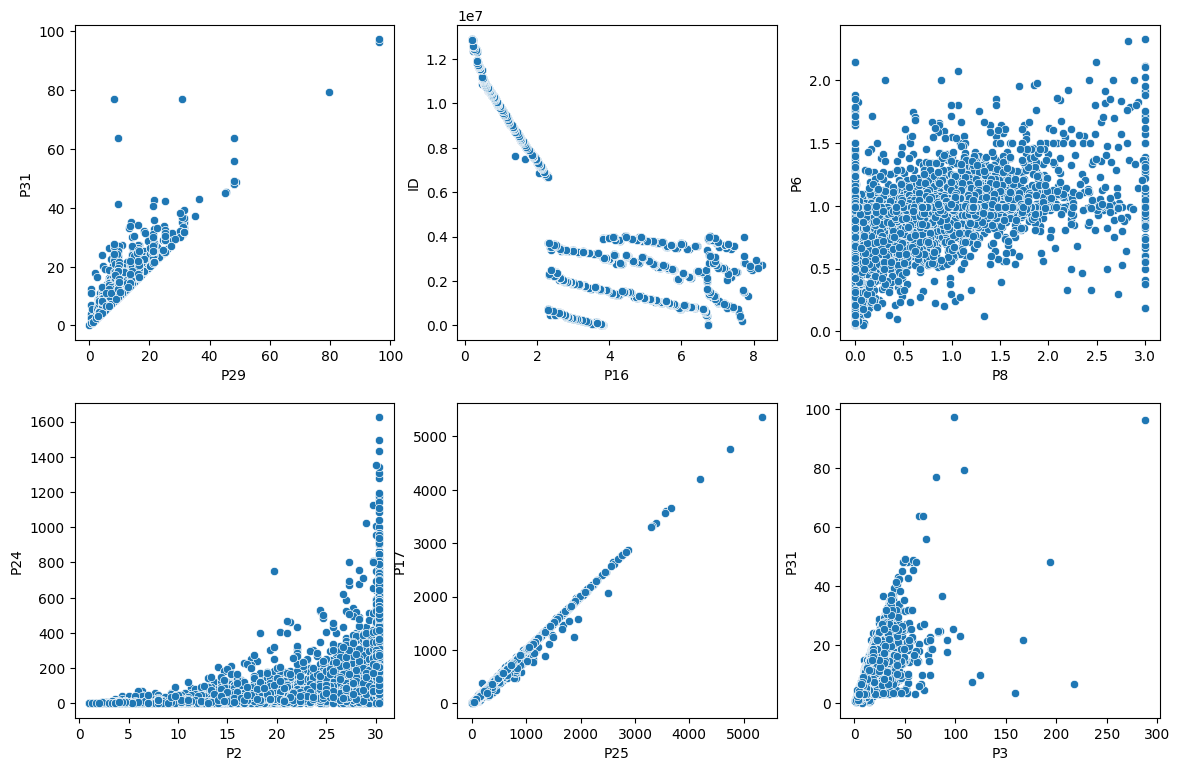

In [16]:
plt.figure(figsize=(14,9))
plt.subplot(2,3,1)    
sns.scatterplot(data=train_data, x="P29", y="P31")
plt.subplot(2,3,2)    
sns.scatterplot(data=train_data, x="P16", y="ID")
plt.subplot(2,3,3)    
sns.scatterplot(data=train_data, x="P8", y="P6")
plt.subplot(2,3,4)    
sns.scatterplot(data=train_data, x="P2", y="P24")
plt.subplot(2,3,5)    
sns.scatterplot(data=train_data, x="P25", y="P17")
plt.subplot(2,3,6)    
sns.scatterplot(data=train_data, x="P3", y="P31");

We can see good dependencies:
- P29 with P31
- P16 with ID
- P2 with P24
- P25 almost linear with P17
- P3 with P31

Let's imput missing values with different approaches:
1. P29 will be predicted from P31 with linear regression;
2. P16 will be predicted from ID with DecisionTree regressor;
3. P8 imput median value, because I don't see some significal relationship
4. P2 will be predicted from P24 with DecisionTree regressor;
5. P25 will be predicted from P17 with linear regression (but probably later we will drop this column because of collinearity problem)
6. P2 will be predicted from P31 with DecisionTree regressor;

In [17]:
#write a function for imputting missing values by regressor model
def impute_values_by_regressor(dataframe, x, y, regressor="tree"):
    """x - col to input missing
       y - col to decision"""
    result_df = dataframe.copy()
    df = result_df[[x, y]]
    X_train = df[df[x].notna()]
    X_test = df[~df[x].notna()][y]
    y_train = X_train[x]
    X_train = X_train[y]
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    if regressor == "tree":
        regr = DecisionTreeRegressor()
    elif regressor == "linear":
        regr = Ridge(alpha=1.0)
    regr.fit(X_train, y_train)
    preds = regr.predict(X_test)
    fill_values = list(preds) 
    indicies_of_missing = result_df[result_df[x].isnull()].index 
    for fill_index, dataframe_index in enumerate(indicies_of_missing):
        result_df.loc[dataframe_index, x] = fill_values[fill_index]  
    return result_df

In [18]:
def impute_nuls(dataframe):
    data = dataframe.copy()
    data = impute_values_by_regressor(data, "P29", "P31", regressor="linear")
    data = impute_values_by_regressor(data, "P16", "ID")
    data = impute_values_by_regressor(data, "P2", "P24")
    data = impute_values_by_regressor(data, "P25", "P17", regressor="linear")
    data = impute_values_by_regressor(data, "P3", "P31")
    data["P8"].fillna(data["P8"].median(), inplace=True)
    return data

In [19]:
data = impute_nuls(train_data)
data

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,283,1,0.0,30.166665,7.085770,10,0,1.02273,1.01608,1.55268,1.15000,30.00000,123.00000,45.54444,3.80000,7.32222,38.22222,3.83333,819.35667,0.00000,1.66667,0.0000,0.28560,831.68333,783.81667,171.33333,818.150000,0.62772,0.13333,0.00000,6.418930,0.97122,6.41893
1,342,0,0.0,30.000000,6.801530,0,0,1.00000,1.65348,1.14852,0.40556,9.00000,78.00000,23.74444,17.97222,0.00000,23.74444,3.83333,316.61667,0.00000,0.33333,0.0000,0.00000,195.13889,168.30000,81.00000,318.826685,6.32407,0.26667,0.33333,3.643183,1.60714,3.44800
2,631,0,0.0,30.000000,9.602670,0,0,1.00000,0.84143,0.88384,0.00000,28.66667,12.66667,15.80000,22.57222,4.58333,11.21667,3.83333,184.49333,0.00000,0.00000,0.0000,-2.28400,226.10556,207.41667,110.00000,184.494440,2.25635,0.00000,0.06667,7.103587,0.75000,8.08000
3,1165,0,0.0,30.333330,15.325530,0,0,0.98901,0.88114,0.88384,2.68333,61.66667,112.33333,121.02222,175.54444,10.20556,110.81667,3.83333,625.32333,0.00000,2.00000,-2.6938,-2.73230,567.53889,441.52778,194.00000,625.322220,2.74469,0.13333,0.40000,13.504000,0.98119,13.50400
4,1469,0,0.0,28.000000,7.541330,0,0,0.92857,1.21447,0.60138,0.00000,26.00000,89.00000,66.92222,7.52778,0.00000,66.92222,3.83333,53.45000,0.00000,0.00000,0.0000,2.42605,154.80556,86.64444,71.66667,53.450000,0.91130,0.46667,0.40000,3.643183,0.40171,3.44800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12590517,0,0.0,18.000000,4.737200,0,0,0.83333,0.94478,0.54532,0.00000,9.00000,10.33333,2.18333,4.20556,0.00000,2.18333,0.23333,27.53000,0.00000,0.00000,0.0000,0.00000,35.63889,33.57422,25.66667,27.527780,0.59411,0.26667,0.26667,3.080000,0.83333,3.08000
9996,12594579,0,0.0,8.000000,7.747100,29,0,0.50000,1.03436,0.29789,3.93333,9.00000,28.00000,8.20000,17.07778,1.69444,6.50556,0.23333,32.65667,0.00000,4.66667,0.0000,0.39930,72.47222,68.27194,20.33333,32.305560,1.47413,0.20000,0.33333,6.571004,1.11434,7.36710
9997,12844266,0,0.0,30.333330,20.659307,0,0,0.98901,1.12891,1.55649,13.00000,38.33333,193.33333,41.19444,44.72778,6.91111,34.28333,0.20000,227.01333,0.00000,22.66667,0.0000,3.61400,212.78889,183.60606,137.66667,225.655560,0.94152,0.20000,0.33333,16.600000,0.78899,16.60000
9998,12857302,0,0.0,28.666670,6.709500,0,0,1.01163,1.02243,0.86369,0.10000,13.33333,48.33333,0.59444,4.05556,0.03889,0.55556,0.20000,363.32667,0.00000,0.33333,-0.0355,0.22575,96.41667,100.09256,74.33333,363.327780,0.61164,0.00000,0.00000,6.560000,1.03121,6.56000


In [20]:
sum(data.isna().sum())

0

Okay, now we don't have any missing values in data

### Working with numerical cols

Now we plot the KDE charts for each variable to observe relationships with the target value

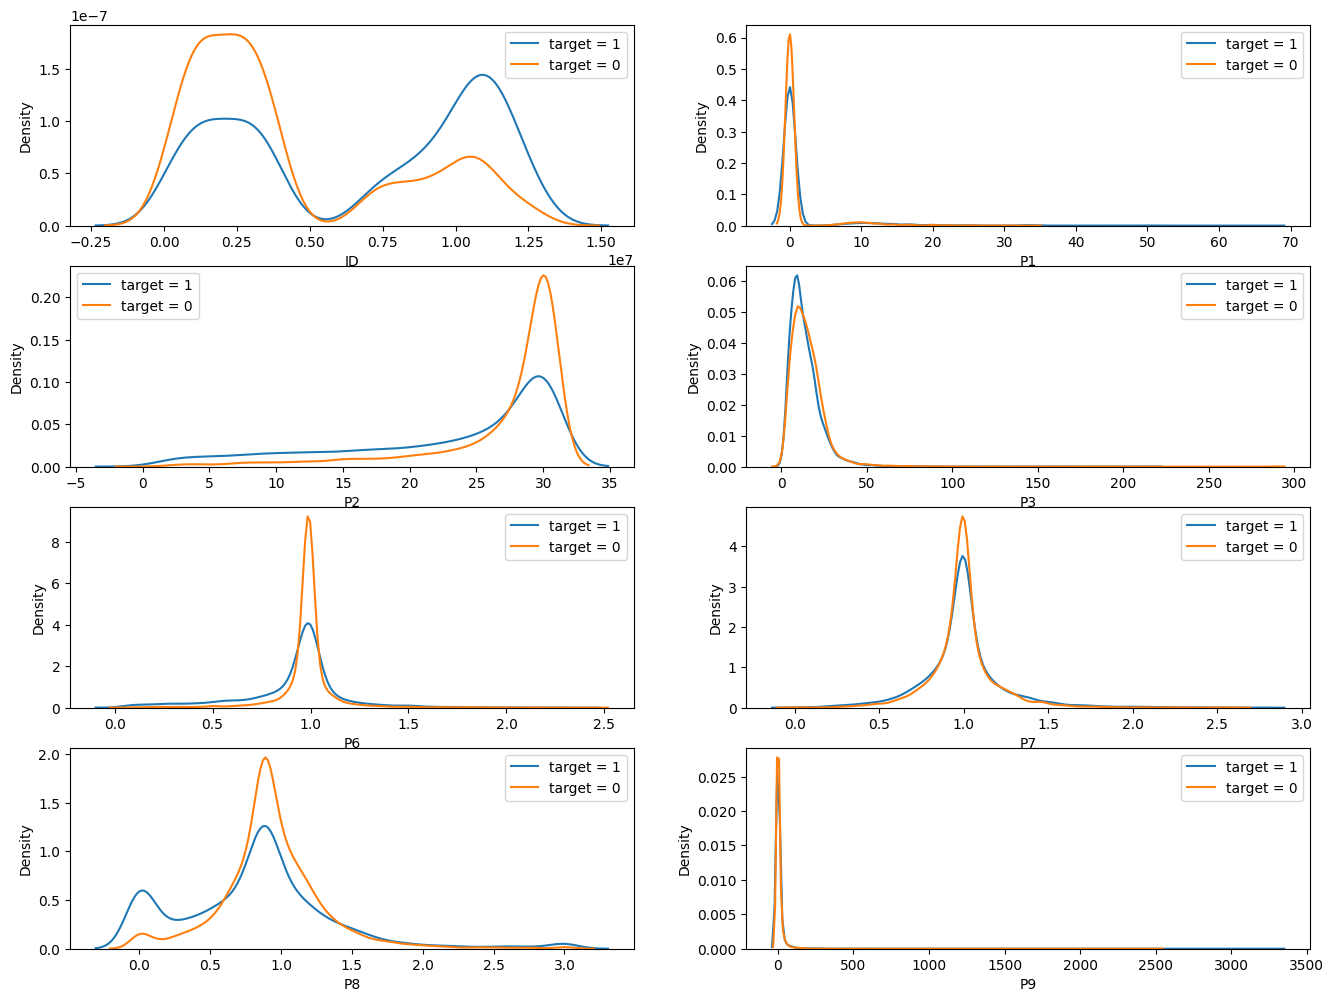

In [21]:
plt.figure(figsize=(16,12))
for i, column in enumerate(data[num_cols].iloc[:,:8], 1):
    plt.subplot(4,2,i)    
    sns.kdeplot(data.loc[data.Target == 1, column], label="target = 1")
    sns.kdeplot(data.loc[data.Target == 0, column], label="target = 0")
    plt.legend();

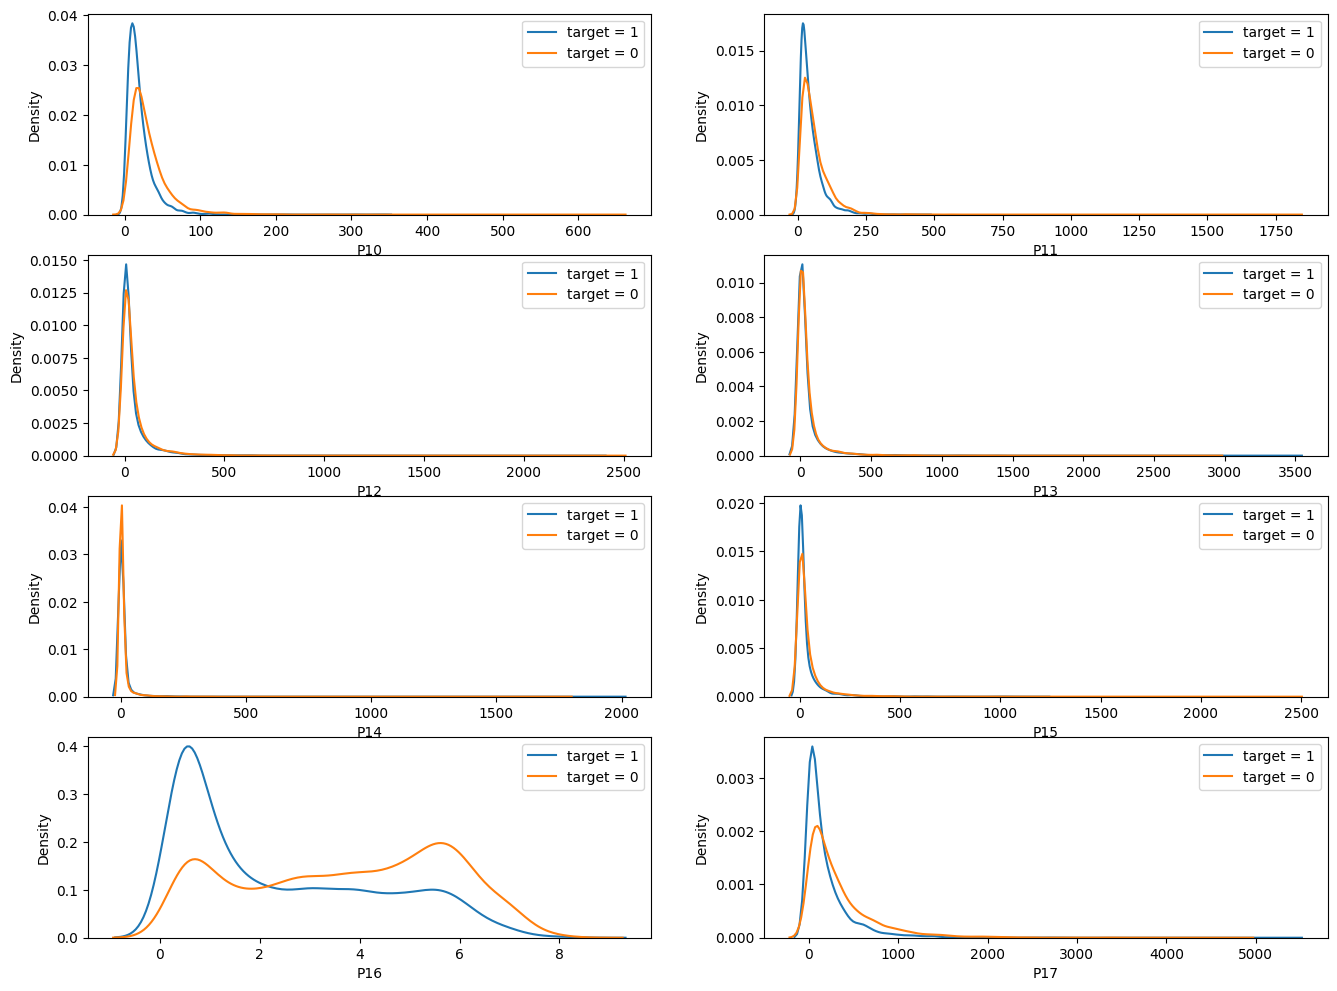

In [22]:
plt.figure(figsize=(16,12))
for i, column in enumerate(data[num_cols].iloc[:,8:16], 1):
    plt.subplot(4,2,i)    
    sns.kdeplot(data.loc[data.Target == 1, column], label="target = 1")
    sns.kdeplot(data.loc[data.Target == 0, column], label="target = 0")
    plt.legend();

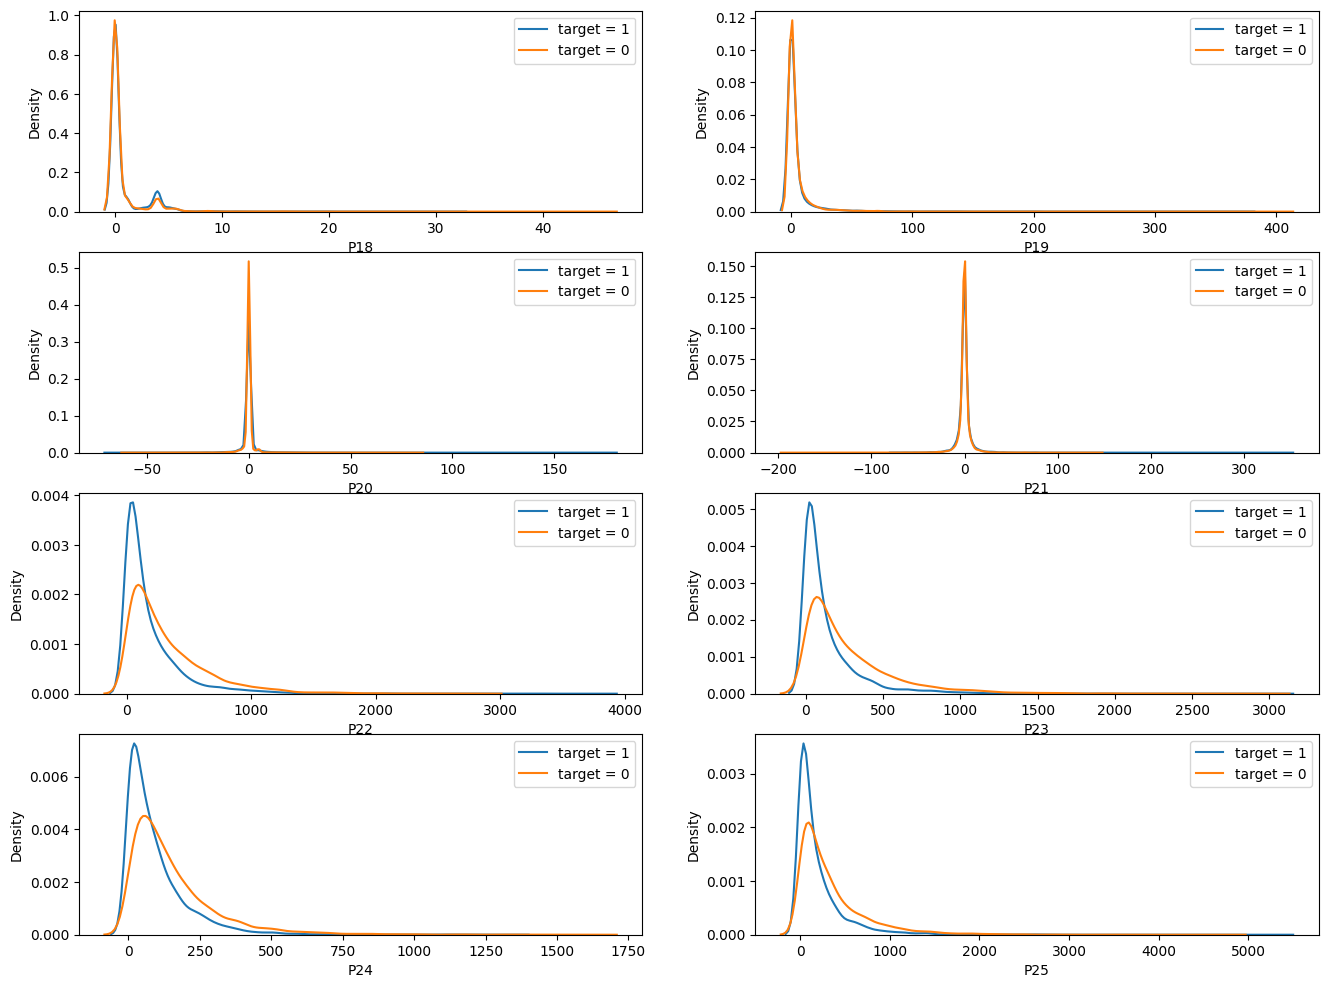

In [23]:
plt.figure(figsize=(16,12))
for i, column in enumerate(data[num_cols].iloc[:,16:24], 1):
    plt.subplot(4,2,i)    
    sns.kdeplot(data.loc[data.Target == 1, column], label="target = 1")
    sns.kdeplot(data.loc[data.Target == 0, column], label="target = 0")
    plt.legend();

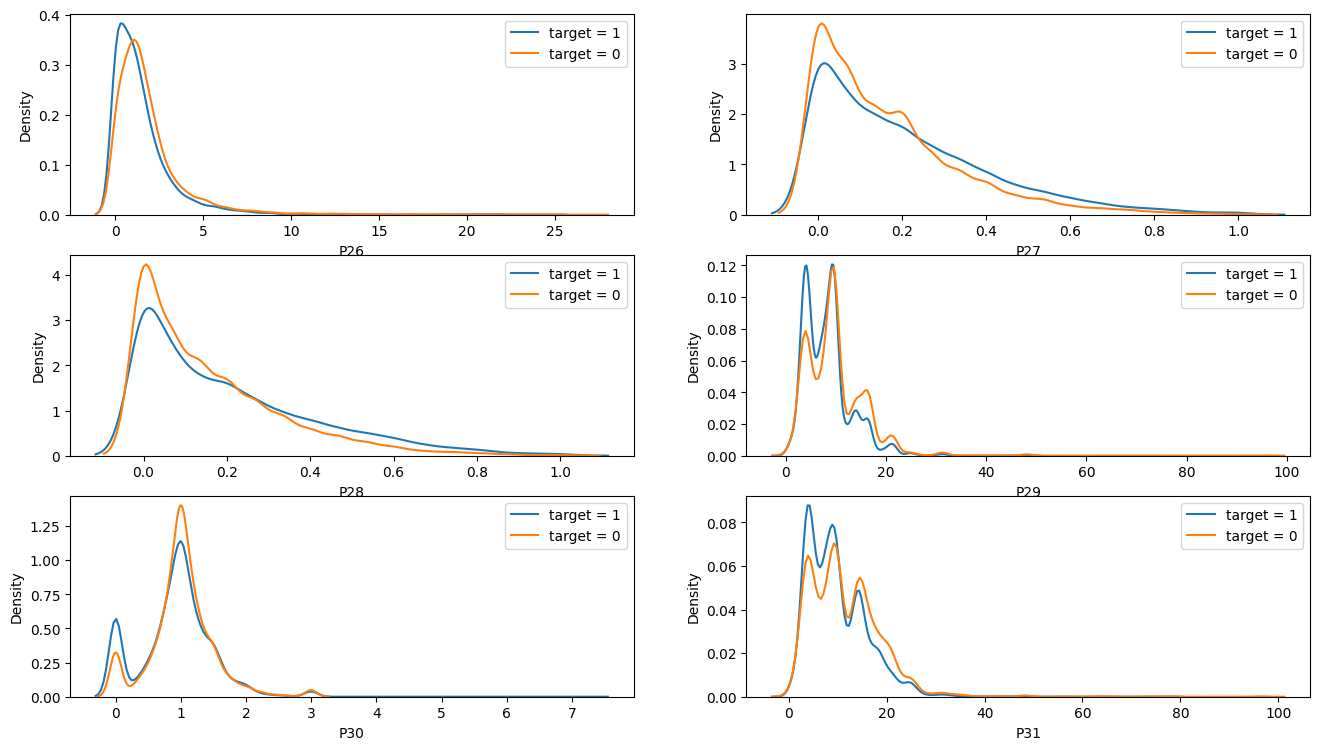

In [24]:
plt.figure(figsize=(16,12))
for i, column in enumerate(data[num_cols].iloc[:,24:], 1):
    plt.subplot(4,2,i)    
    sns.kdeplot(data.loc[data.Target == 1, column], label="target = 1")
    sns.kdeplot(data.loc[data.Target == 0, column], label="target = 0")
    plt.legend();

After looking at this charts we can make some conclusions:
- P1, P3, P7, P9, P13, P14, P19, P20, P21, P5, P18 will not help us to predict the target. And we can drop it for dimensional reduction;
- ID, P8, P16 could be a good features for prediction

In [25]:
#drop redunant features
data2 = data.copy()
data2.drop(columns=["P1", "P3", "P7", "P9", "P13", "P14", "P19", "P20", "P21", "P5",  "P18"], inplace=True)

Plot the corr matrix between other features to see linear dependencies between features

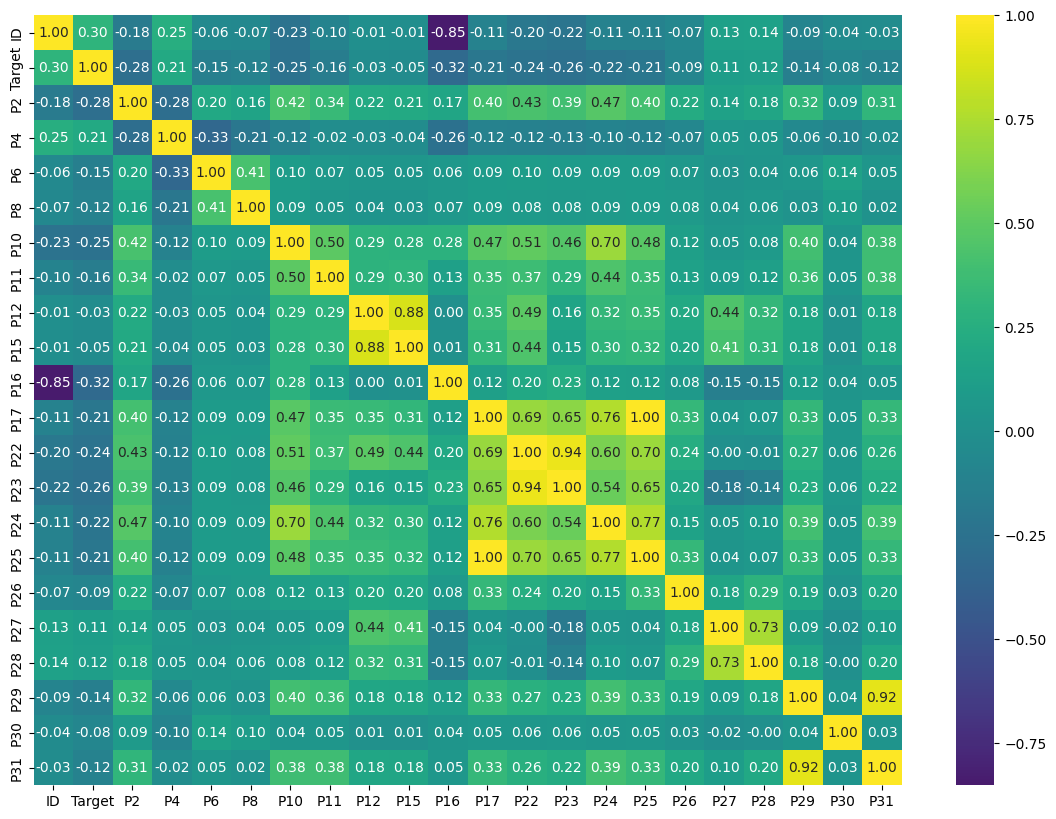

In [26]:
corr_matrix = data2.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, center=0, annot=True, cmap="viridis", fmt='.2f');

P17 and P25 are linearly dependent features. Drop one of them:

In [27]:
data2.drop(columns=["P25"], inplace=True)

And this is final dataset:

In [28]:
data2

,ID,Target,P2,P4,P6,P8,P10,P11,P12,P15,P16,P17,P22,P23,P24,P26,P27,P28,P29,P30,P31
0,283,1,30.166665,10,1.02273,1.55268,30.00000,123.00000,45.54444,38.22222,3.83333,819.35667,831.68333,783.81667,171.33333,0.62772,0.13333,0.00000,6.418930,0.97122,6.41893
1,342,0,30.000000,0,1.00000,1.14852,9.00000,78.00000,23.74444,23.74444,3.83333,316.61667,195.13889,168.30000,81.00000,6.32407,0.26667,0.33333,3.643183,1.60714,3.44800
2,631,0,30.000000,0,1.00000,0.88384,28.66667,12.66667,15.80000,11.21667,3.83333,184.49333,226.10556,207.41667,110.00000,2.25635,0.00000,0.06667,7.103587,0.75000,8.08000
3,1165,0,30.333330,0,0.98901,0.88384,61.66667,112.33333,121.02222,110.81667,3.83333,625.32333,567.53889,441.52778,194.00000,2.74469,0.13333,0.40000,13.504000,0.98119,13.50400
4,1469,0,28.000000,0,0.92857,0.60138,26.00000,89.00000,66.92222,66.92222,3.83333,53.45000,154.80556,86.64444,71.66667,0.91130,0.46667,0.40000,3.643183,0.40171,3.44800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12590517,0,18.000000,0,0.83333,0.54532,9.00000,10.33333,2.18333,2.18333,0.23333,27.53000,35.63889,33.57422,25.66667,0.59411,0.26667,0.26667,3.080000,0.83333,3.08000
9996,12594579,0,8.000000,29,0.50000,0.29789,9.00000,28.00000,8.20000,6.50556,0.23333,32.65667,72.47222,68.27194,20.33333,1.47413,0.20000,0.33333,6.571004,1.11434,7.36710
9997,12844266,0,30.333330,0,0.98901,1.55649,38.33333,193.33333,41.19444,34.28333,0.20000,227.01333,212.78889,183.60606,137.66667,0.94152,0.20000,0.33333,16.600000,0.78899,16.60000
9998,12857302,0,28.666670,0,1.01163,0.86369,13.33333,48.33333,0.59444,0.55556,0.20000,363.32667,96.41667,100.09256,74.33333,0.61164,0.00000,0.00000,6.560000,1.03121,6.56000


### Predictions

Prepare data for prediction:
- split to train and test set (75% : 25%)
- Z-score scaling of numerical columns

In [29]:
X = data2.drop(columns=["Target"])
y = data2.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2000, shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**We have only 10.000 samples in training data. And many noisy features. Let's use simple LogisticRegression model with L1
regularization.** 

Classes are balanced in target (50/50). So we can use accuracy metric for intermediate testing

In [30]:
clf = LogisticRegression(random_state=0, C=0.5, penalty="l1", solver="liblinear", max_iter=1500).fit(X_train, y_train)
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

0.7108

**Accuracy - 0.71, not very good**

Plot the ROC curve

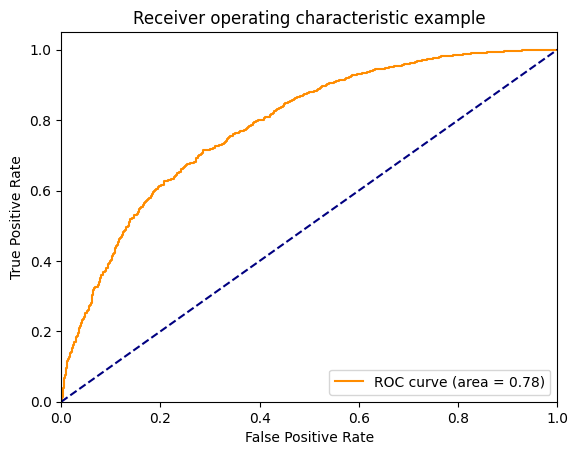

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**ROC-AUC score is 0.78**

Let's do the cross-validation technique with 10 folds and roc-auc metric for more accurate estimation

In [32]:
clf = LogisticRegression(random_state=0, C=0.5, penalty="l1", solver="liblinear", max_iter=500)
cross_val_score(clf, X, y, cv=10, scoring="roc_auc", n_jobs=-1)

array([0.695804, 0.77574 , 0.732268, 0.933216, 0.9346  , 0.92806 ,
       0.250164, 0.25302 , 0.687308, 0.904944])

Look's very interesting. We have very different results by each fold. Some of folds have **0.25 score**, when another has **0.9 and more**. 

Make another train/test partitioning, with 0.1 test size and without shuffling the data. 

In [33]:
X = data2.drop(columns=["Target"])
y = data2.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2000, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = LogisticRegression(random_state=0, C=0.5, penalty="l1", solver="liblinear", max_iter=1500).fit(X_train, y_train)
preds = clf.predict(X_test)
accuracy_score(y_test, preds)

0.814

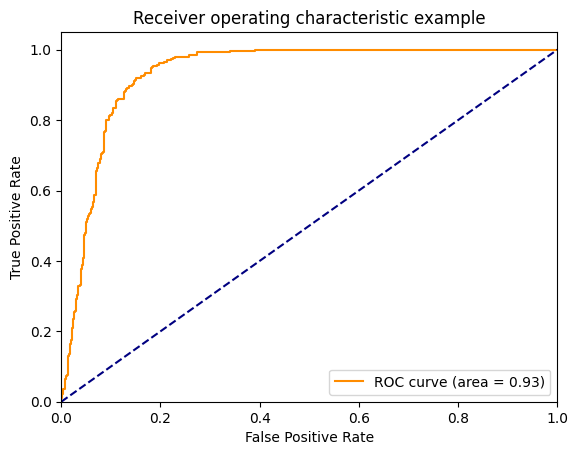

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Accuracy score increased to **0.81** and ROC-AUC to **0.93**.

**Probably we have some anomaly examples in our dataset. And it greatly affects the results depending on the splitting of the data. Examples with indexes from 7300 to 9300 have 2000 consecutive "1" in target. And from 9300 to the end have 700 consecutive "0". But we don't know where are our data came from and maybe these values also make sense. So let's just leave it at that.**

**To get an unbiased estimate of our model with this data we will use Nested-Cross-Validation**

![NestedCV](https://i.stack.imgur.com/vh1sZ.png)

In [35]:
#The code to run Nested-CV
X = data2.drop(columns=["Target"])
y = data2.Target
scaler = StandardScaler()
X = scaler.fit_transform(X)
scoring = {
        "accuracy": "accuracy",        
        "roc_auc": "roc_auc",
        "precision": "precision",
        "recall": "recall"
    }
clf = LogisticRegression(max_iter=500, solver="liblinear", random_state=42, fit_intercept=True)
params = {"C": [0.01, 0.1, 0.5], "penalty":["l1"]}
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)
gsc = GridSearchCV(
        clf, params, cv=cv_inner, scoring="roc_auc", refit=True, n_jobs=-1
    )
cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(gsc, X, y, scoring=scoring, cv=cv_outer, n_jobs=-1)
roc_auc = np.mean(scores["test_roc_auc"])
precision = np.mean(scores["test_precision"])
recall = np.mean(scores["test_recall"])
gsc.fit(X, y)
best_model = gsc.best_estimator_
best_params = gsc.best_params_
print(f"The best model is - {best_model}")
print(f"Precision - {precision}")
print(f"Recall - {recall}")
print(f"ROC-AUC score - {roc_auc}")

The best model is - LogisticRegression(C=0.5, max_iter=500, penalty='l1', random_state=42,
                   solver='liblinear')
Precision - 0.707386571167379
Recall - 0.6989317119699905
ROC-AUC score - 0.7760987126204582


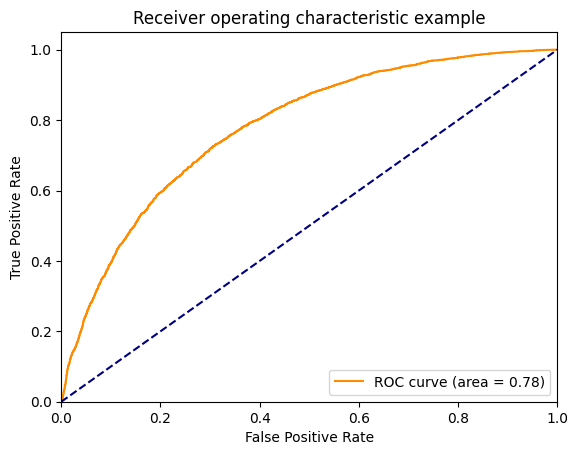

In [36]:
#plot the rocauc curve
fpr, tpr, thresholds = roc_curve(y, best_model.predict_proba(X)[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Our final ROC-AUC is 0.78. With this data maybe it is not very bad.**

Plot the confusion matrix

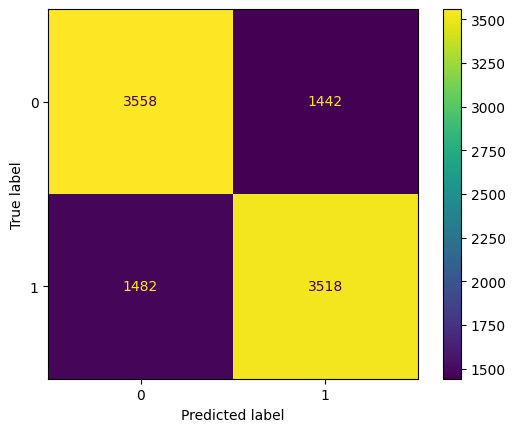

In [37]:
ConfusionMatrixDisplay.from_estimator(best_model, X, y);

We have approximately the same count of false-positives and false-negatives.

Let's see where we got the most of false results

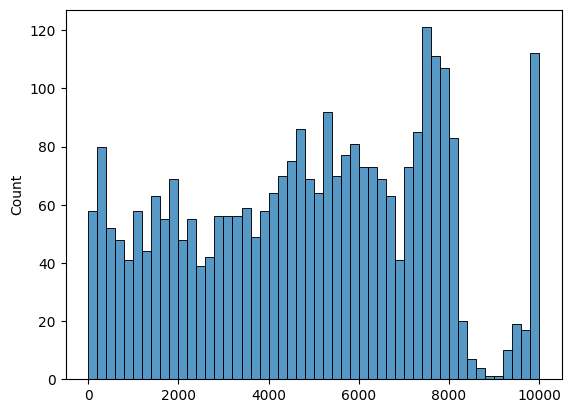

In [38]:
best_model.predict(X)
data3 = data2.copy()
data3["preds"] = best_model.predict(X)
sns.histplot(data3[data3.Target != data3.preds].index, bins=50);

The most of faults is concentrating near 7000-8000 rows and 9500-10000 of our data. Maybe there are very noisy data.

### Feature importance

In [39]:
X = data2.drop(columns=["Target"])
y = data2.Target
X = scaler.fit_transform(X)
scoring = {                
        "roc_auc": "roc_auc"        
    }
clf = RandomForestClassifier(n_estimators=100)
params = {
            "max_depth": [13, 15],
            "min_samples_leaf": [9, 12],
            "min_samples_split": [30, 50, 70],
        }
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
gsc = GridSearchCV(
        clf, params, cv=cv_inner, scoring="roc_auc", refit=True, n_jobs=-1
    )
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_validate(gsc, X, y, scoring=scoring, cv=cv_outer, n_jobs=-1)
roc_auc = np.mean(scores["test_roc_auc"])
gsc.fit(X, y)
model = gsc.best_estimator_
best_params = gsc.best_params_

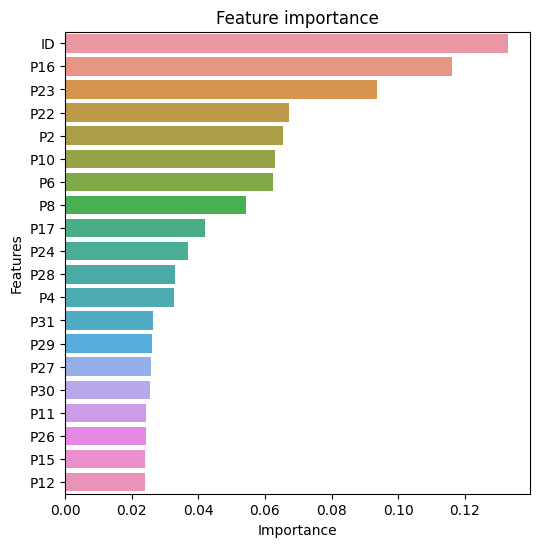

In [40]:
columns = data2.drop(columns=["Target"]).columns
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({'features':list(columns), 
                                       'feature_importances':  model.feature_importances_})\
                        .sort_values(by='feature_importances', ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title("Feature importance")
plt.show()

**"ID", "P16" and "P23" are the most important features for target prediction.**

### Prediction for the test set

In [41]:
test_data = pd.read_excel("data/Ex1_2.xlsx", sheet_name = 2)

In [42]:
test_data.drop(columns="Target", inplace=True)

In [43]:
miss_data = pd.DataFrame({
    'Missing': test_data.isna().sum(),
    'Missing(%)': (test_data.isna().sum() / test_data.shape[0]) * 100
}).sort_values(by='Missing', ascending=False).query("Missing != 0")
miss_data

,Missing,Missing(%)
P25,3021,15.105
P8,3015,15.075
P29,3013,15.065
P16,3003,15.015
P3,2979,14.895
P2,2968,14.840


In [44]:
test_data = impute_nuls(test_data)
test_data.drop(columns=["P1", "P3", "P7", "P9", "P13", "P14", "P19", "P20", "P21", "P5",  "P18", "P25"], inplace=True)
X_test = scaler.transform(test_data)
preds = best_model.predict(X_test).astype(int)
np.savetxt("task2_predictions.csv", preds, delimiter=",", fmt='%.f')